# Funnel Analysis


## Goal


The goal is to perform funnel analysis for an e-commerce website.


The main focus are:


1. To give A full picture of funnel conversion rate for both desktop and mobile.


2. To investigate whether there is something wrong in the conversion funnel;


3. To suggest how conversion rate can be improved by the product team;


## Background Information


The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.


From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, she will get to the payment page.


where she is asked to provide payment information in order to buy that product.


If she does decide to buy, she ends up on the confirmation page.

# Final Suggestions to improve the conversion rate for the product team

The most urgent issue is to figure out what happens on 3-1-2015 to make sure that this data source is valid or whether we need to recalculte or redesign this experiment. Here I assume this is not a technical error but the true reflection of the market. 

Also, I would like more data, such as:

(1) customers' tracks: time-stamp for each user

(2) more individual information: whether any particular user is a return-customer or a new user, their age and so on

(3) the interaction: what their response to our promotions/pushes

I am going to give my suggestions along with the process of completing a purchase.


1. About getting more new users

  (1) For the platform, we should promote more exposure for our mobile platform. Because it is clear that for the mobile platform, it gains less new users, compared with the desktop platform. 
  
  (2) For the gender, female users tend to continue the process. Based on this, we should have different strategies for users of different gender, i.e. treating them as two different segmentations.


2. About getting users to buyers

This is the weakest point in the whole process, since the rate of losing users is highest in this stage, among all the stages we can monitor.

  (1) For the platform, we can see the change in the relative positions of desktop platform and mobile platform. Most new users are leaving from deaktop platform in this stage, so, we need to figure out why and to take some effective measures to prevent from the loss of users.
  
  (2) For the gender, the distribution is the similar except it halves when the overall rate decreases. As a result, my suggestion for this stage stays the same.
  
  
3. About settling down the deal

Overall, in this stage, the rate performs not too bad. But this might caused by the small amount of users reaching this stage. And, this stage should have lower chance to lose users since they have already made up their mind to buy something. So, we need more tests to check whether we can largely improve this stage from all angles. For now, here are my suggestions:

  (1) For the platform, the desktop platform outperforms the mobile platform in this stage. We need to check whether there are something blocking users from comfirming the payments on the mobile platform.
  
  (2) For the gender, I wasn't expectiong difference between two groups, since in this stage, there should not be a lot of decisions to make. So, I would suggest to check the payment confirmation stage carefully.

In [1]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import date, timedelta


import pdpbox
from pdpbox import pdp
from pdpbox.info_plots import target_plot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree.export import export_text
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
home = pd.read_csv('home_page_table.csv')
pay_con = pd.read_csv('payment_confirmation_table.csv')
pay = pd.read_csv('payment_page_table.csv')
search = pd.read_csv('search_page_table.csv')
user = pd.read_csv('user_table.csv',parse_dates=['date'])

In [3]:
home.columns = ['user_id','home_page']
home.head()

,user_id,home_page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [4]:
pay_con.columns = ['user_id','payment_confirmation']
pay_con.head()

,user_id,payment_confirmation
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [5]:
pay.columns = ['user_id','payment_page']
pay.head()

,user_id,payment_page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [6]:
search.columns = ['user_id','search_page']
search.head()

,user_id,search_page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [7]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [8]:
df = pd.merge(user,home, how='outer')
df = pd.merge(df,search, how='outer')
df = pd.merge(df,pay, how='outer')
df = pd.merge(df,pay_con, how='outer')

In [9]:
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [10]:
df = df.replace('home_page',1, regex=True)
df = df.replace('search_page',1, regex=True)
df = df.replace('payment_page',1, regex=True)
df = df.replace('payment_confirmation',1, regex=True)
df = df.fillna(0)

In [11]:
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0


## Funnel Conversion Rate Comparison Across Platform

In [12]:
viz = pd.DataFrame(df.groupby('device').sum())

In [13]:
viz['hs_ratio'] = 100*viz['search_page']/viz['home_page']
viz['sp_ratio'] = 100*viz['payment_page']/viz['search_page']
viz['pc_ratio'] = 100*viz['payment_confirmation']/viz['payment_page']
viz['all_ratio'] = 100*viz['payment_confirmation']/viz['home_page']

In [14]:
viz

,user_id,home_page,search_page,payment_page,payment_confirmation,hs_ratio,sp_ratio,pc_ratio,all_ratio
device,,,,,,,,,
Desktop,30008771866,60200,30100.0,3010.0,150.0,50.0,10.0,4.983389,0.249169
Mobile,15074583520,30200,15100.0,3020.0,302.0,50.0,20.0,10.000000,1.000000


In [15]:
funs = ['home_page','search_page','payment_page','payment_confirmation']
funs_d = viz[viz.index=='Desktop'][funs].values[0].tolist()
funs_m = viz[viz.index=='Mobile'][funs].values[0].tolist()
fun_vs = np.subtract(funs_d,funs_m)
fun_ds = np.multiply(np.sign(fun_vs),np.log(abs(fun_vs)))

In [16]:
ras = ['hs_ratio','sp_ratio','pc_ratio','all_ratio']
ras_d = viz[viz.index=='Desktop'][ras].values[0].tolist()
ras_m = viz[viz.index=='Mobile'][ras].values[0].tolist()

Text(0.5, 1.0, 'Frequency of each step (Desktop and Mobile)')

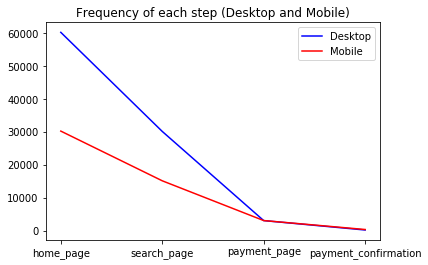

In [17]:
line_d, = plt.plot(funs, funs_d,color = 'blue', label='Desktop')
line_m, = plt.plot(funs, funs_m,color = 'red', label='Mobile')
plt.legend(handles=[line_d, line_m])
plt.title('Frequency of each step (Desktop and Mobile)')

Text(0.5, 1.0, 'The Difference in Frequency (Desktop - Mobile)')

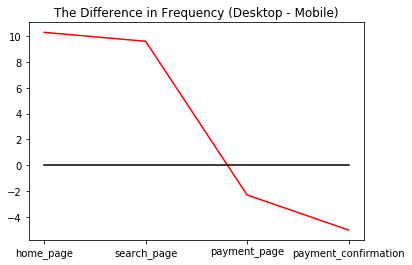

In [18]:
plt.plot(funs, fun_ds ,color = 'red')
plt.plot(funs, [0]*4 ,color = 'black')
plt.title('The Difference in Frequency (Desktop - Mobile)')

Text(0.5, 1.0, 'Conversion Rate of each step (Desktop and Mobile)')

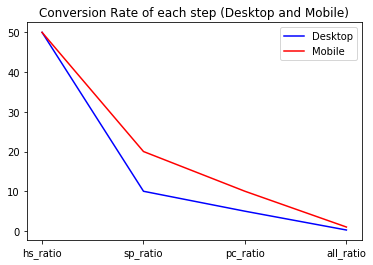

In [19]:
line_rd, = plt.plot(ras, ras_d,color = 'blue', label='Desktop')
line_rm, = plt.plot(ras, ras_m,color = 'red', label='Mobile')
plt.legend(handles=[line_rd, line_rm])
plt.title('Conversion Rate of each step (Desktop and Mobile)')

Conclusion:


1. This happens for both platforms: before users reach the payment page, the number of users reaching the next step drops quickly. The dropping speeds are almost the same between the dropping speed in the process of home page to search page and that in the process of search page to payment page. After users reach the payment page, the drop slows down. This implies the change in the mindset of the users.

2. Desktop platform is exposed to more users, this may result from the ease of viewing innformation on the website and searching items.

3. On mobile platform, it is more likely for users to make the decision to purchase some products and to confirm the payment.


## Data exploratory analysis

In [20]:
def mean_count(dt,group_var,target_var):
    mean = pd.DataFrame(dt.groupby(group_var)[target_var].mean()).reset_index()
    mean.columns = [group_var,'mean']
    count = pd.DataFrame(dt.groupby(group_var)[target_var].count()).reset_index()
    count.columns = [group_var,'count']
    mc = pd.merge(left=mean,right=count, left_on=group_var, right_on=group_var)
    return mc

In [21]:
def mc_plot(df,groupvar):
    fig, ax = plt.subplots(figsize=(16,4))
    sns.lineplot(x=df[groupvar], 
                 y=df['mean'],
                 color='r',
                 ax=ax)
    sns.lineplot(x=df[groupvar], 
                 y=df['count'], 
                 color='b',
                 ax=ax)    
    ax.legend(['mean', 'count'], facecolor='w')
    plt.show()

In [22]:
df_s = df[df['search_page']==1]
df_p = df[df['payment_page']==1]

In [23]:
df.columns

Index(['user_id', 'date', 'device', 'sex', 'home_page', 'search_page',
       'payment_page', 'payment_confirmation'],
      dtype='object')

### Search page

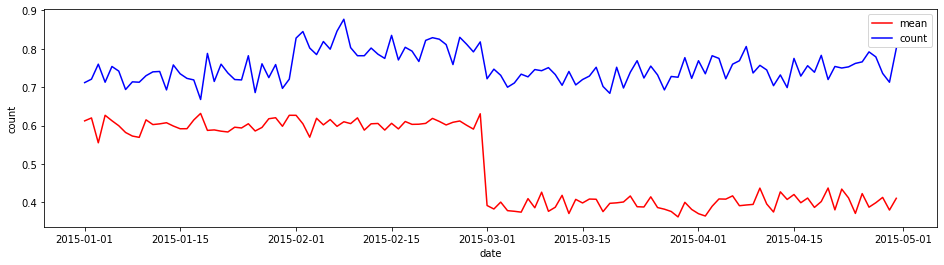

In [24]:
date_mc = mean_count(df,group_var='date',target_var='search_page')
date_mc['count'] = date_mc['count'] /10**3
mc_plot(date_mc,groupvar = 'date')

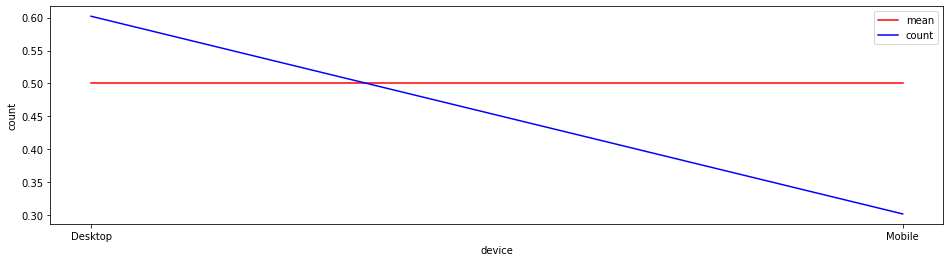

In [25]:
device_mc = mean_count(df,group_var='device',target_var='search_page')
device_mc['count'] = device_mc['count'] /10**5
mc_plot(device_mc,groupvar = 'device')

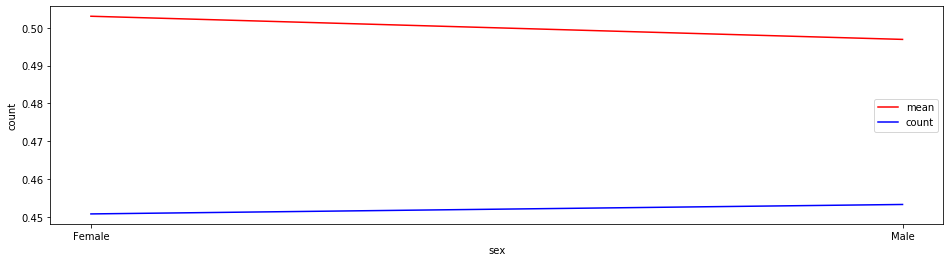

In [26]:
sex_mc = mean_count(df,group_var='sex',target_var='search_page')
sex_mc['count'] = sex_mc['count'] /10**5
mc_plot(sex_mc,groupvar = 'sex')

### Payment page

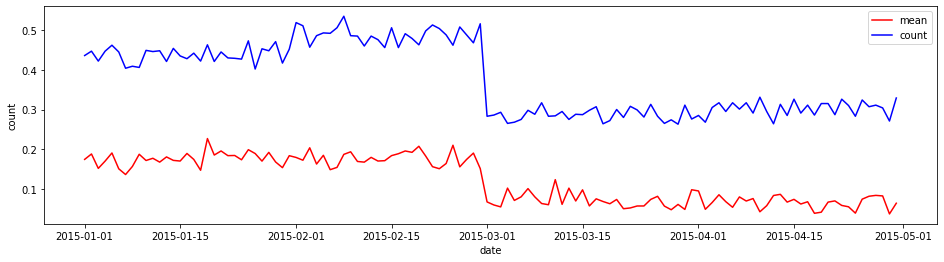

In [27]:
date_mc_s = mean_count(df_s,group_var='date',target_var='payment_page')
date_mc_s['count'] = date_mc_s['count'] /10**3
mc_plot(date_mc_s,groupvar = 'date')

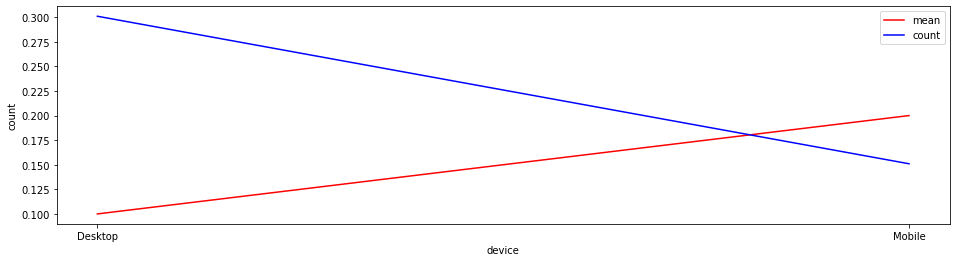

In [28]:
device_mc_s = mean_count(df_s,group_var='device',target_var='payment_page')
device_mc_s['count'] = device_mc_s['count'] /10**5
mc_plot(device_mc_s,groupvar = 'device')

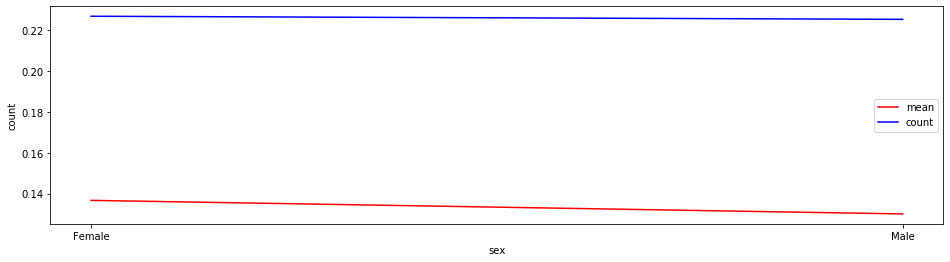

In [29]:
sex_mc_s = mean_count(df_s,group_var='sex',target_var='payment_page')
sex_mc_s['count'] = sex_mc_s['count'] /10**5
mc_plot(sex_mc_s,groupvar = 'sex')

### Payment confirmation

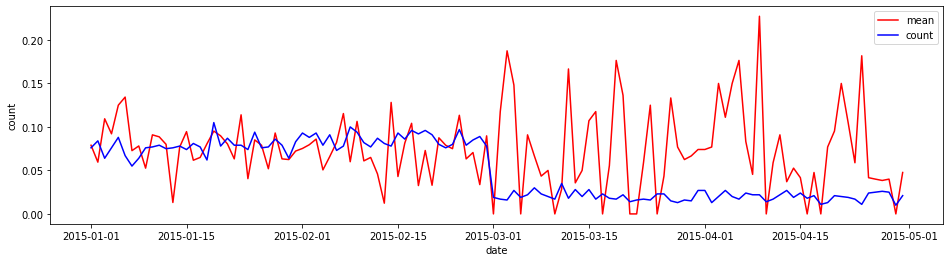

In [30]:
date_mc_p = mean_count(df_p,group_var='date',target_var='payment_confirmation')
date_mc_p['count'] = date_mc_p['count'] /10**3
mc_plot(date_mc_p,groupvar = 'date')

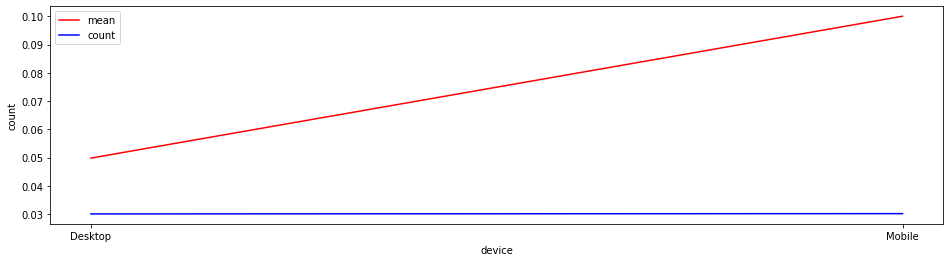

In [31]:
device_mc_p = mean_count(df_p,group_var='device',target_var='payment_confirmation')
device_mc_p['count'] = device_mc_p['count'] /10**5
mc_plot(device_mc_p,groupvar = 'device')

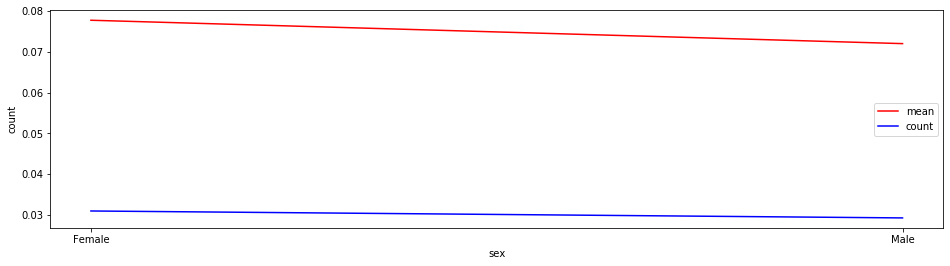

In [32]:
sex_mc_p = mean_count(df_p,group_var='sex',target_var='payment_confirmation')
sex_mc_p['count'] = sex_mc_p['count'] /10**5
mc_plot(sex_mc_p,groupvar = 'sex')

Conclusion

According to the data explortary analysis on each category of variables on users, it is noticeably weird that whether the date before or after 2015-3-1 makes large difference in each step of the funnel. There seems to be some significant change happens that day and it filtered some of the users in the first two steps and it enlarges the variance on conversion rate at the final step.

## Random forest classification

I use random forest classifier on the data of each step to find out the important feature to predict whether this user will go to the next step. 

In [33]:
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0


In [34]:
df.columns

Index(['user_id', 'date', 'device', 'sex', 'home_page', 'search_page',
       'payment_page', 'payment_confirmation'],
      dtype='object')

In [35]:
df_h_s = df[['date', 'device', 'sex', 'search_page']]
df_h_s['date'] = df_h_s['date'].astype(int)/ 10**15
df_h_s = pd.get_dummies(df_h_s, prefix_sep="_",columns=['device','sex'])
df_h_s = df_h_s[['date', 'search_page', 'device_Desktop','sex_Male']]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_h_s[['date', 'device_Desktop','sex_Male']]
y = df_h_s['search_page']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6021386430678466


No handles with labels found to put in legend.


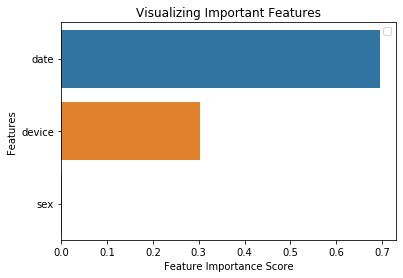

In [37]:
feature_imp = pd.Series(clf.feature_importances_,index=['date', 'device', 'sex']).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
